In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [29]:
df = pd.read_csv('cleaned_dataset.csv',index_col=0)

<AxesSubplot: >

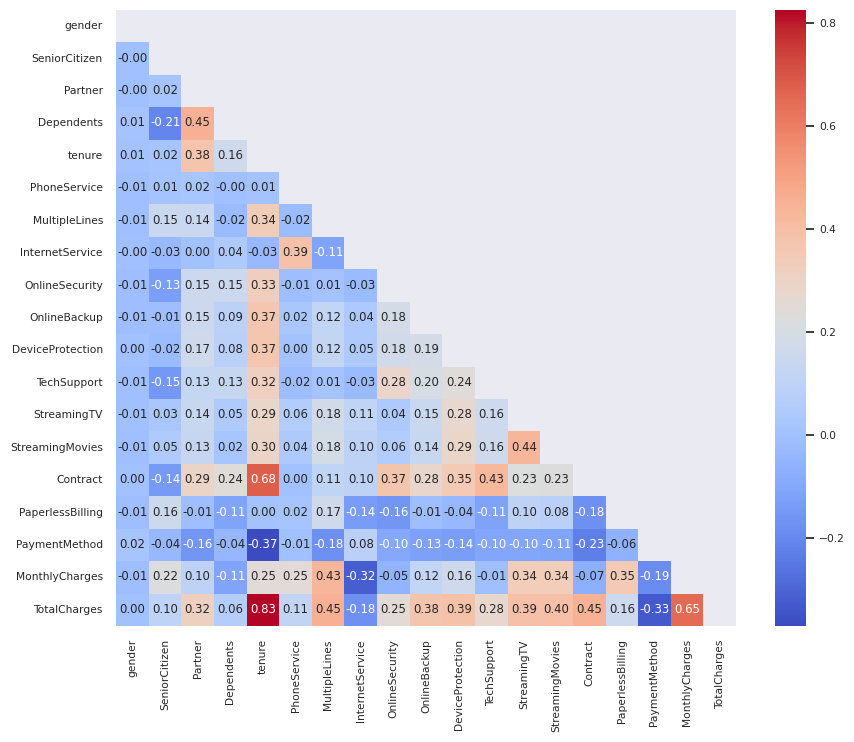

In [30]:
independent_features_df = df.select_dtypes(include=['number']).copy().drop(columns=['Churn'])
corr_matrix = independent_features_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.set(font_scale=0.7)
sns.heatmap(corr_matrix,annot=True, fmt=".2f", cmap="coolwarm", mask=mask)

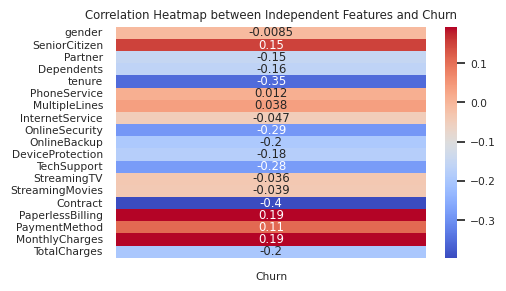

In [31]:
correlation_data = df.select_dtypes(include=['number']).corr().loc[:'TotalCharges', 'Churn']


# Create a heatmap
plt.figure(figsize=(5, 3))
sns.set(font_scale=0.7)
sns.heatmap(correlation_data.to_frame(), annot=True, cmap="coolwarm", cbar=True)

plt.title("Correlation Heatmap between Independent Features and Churn")
plt.show()

In [32]:
df[df.duplicated()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
961,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,3,45.70,45.70,1
1334,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.15,20.15,1
1486,0,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,19.55,19.55,0
1734,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,69.90,69.90,1
1927,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.20,20.20,0
2708,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,1,3,20.45,20.45,0
2887,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.45,20.45,0
3296,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,69.60,69.60,1
3748,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.05,20.05,0
4091,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,1,3,20.20,20.20,1


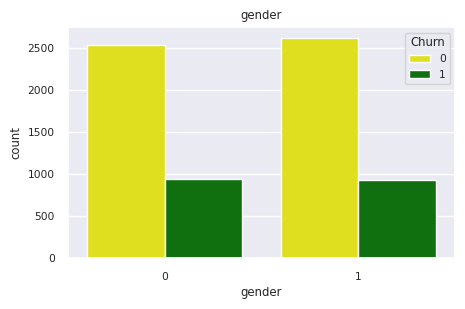

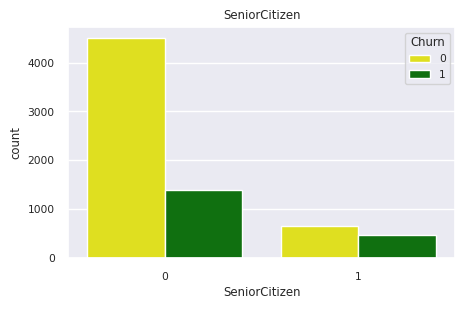

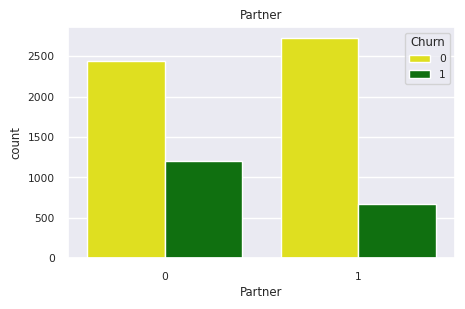

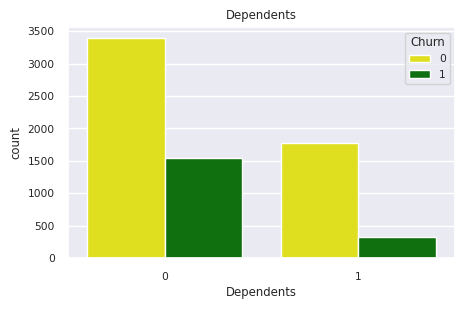

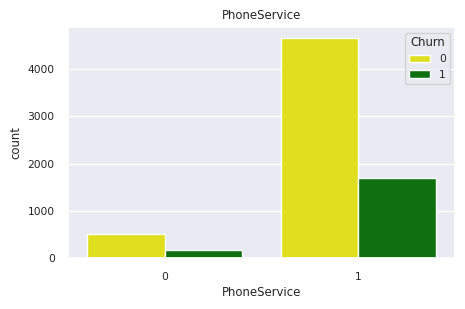

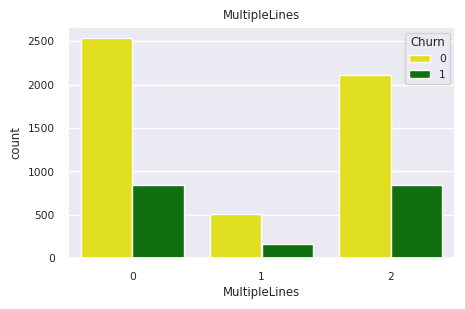

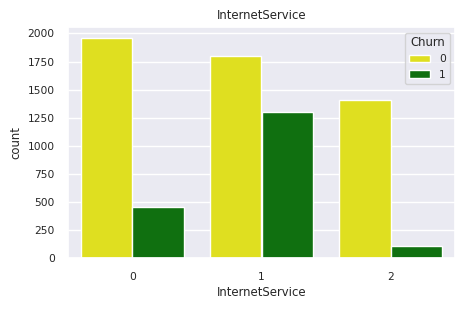

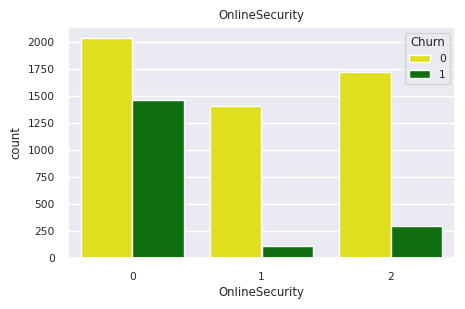

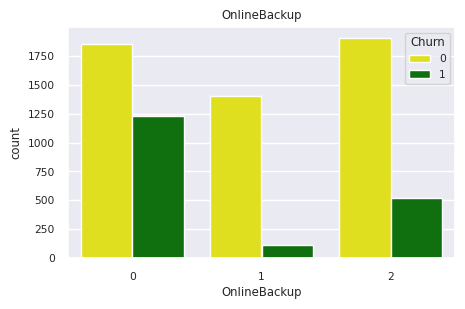

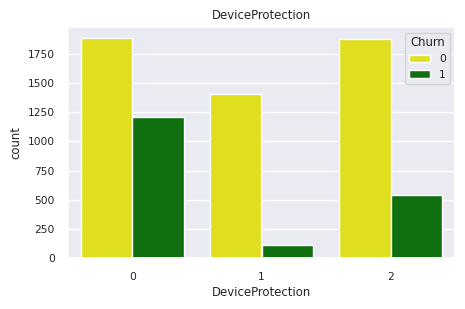

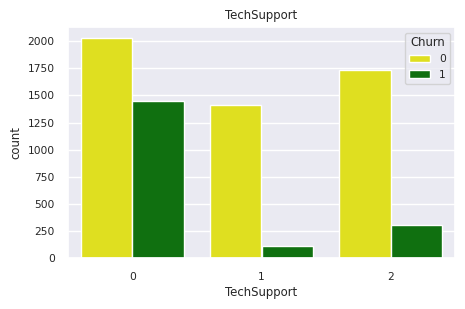

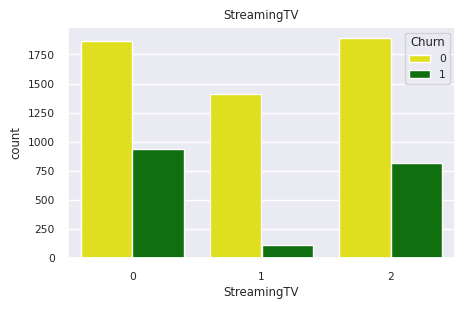

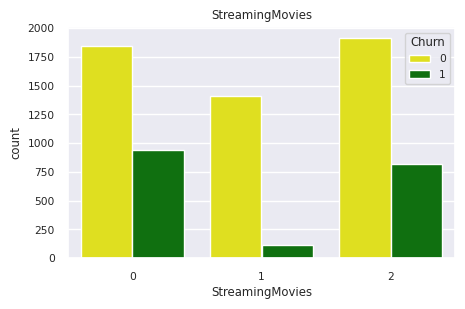

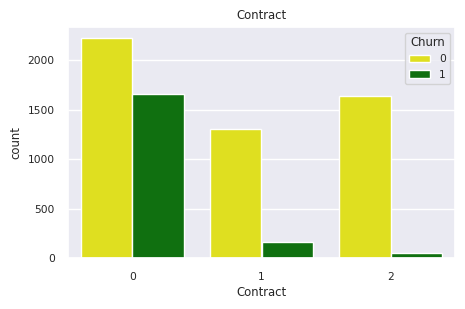

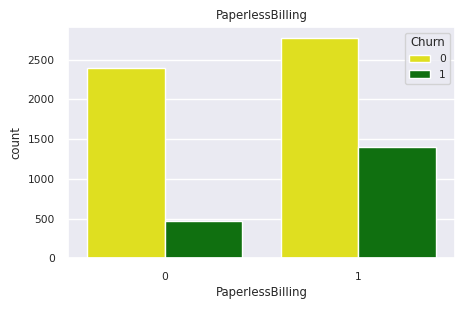

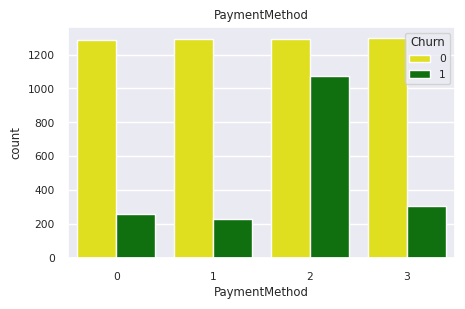

In [33]:
# Define colors for Yes and No
colors = {'Yes': 'yellow', 'No': 'green'}

# Add missing keys for 0 and 1 in the palette
palette = {0: 'yellow', 1: 'green'}

for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure'])):
    plt.figure(i, figsize=(5, 3))
    sns.countplot(data=df, x=predictor, hue='Churn', palette=palette)
    plt.title(predictor)
    plt.show()

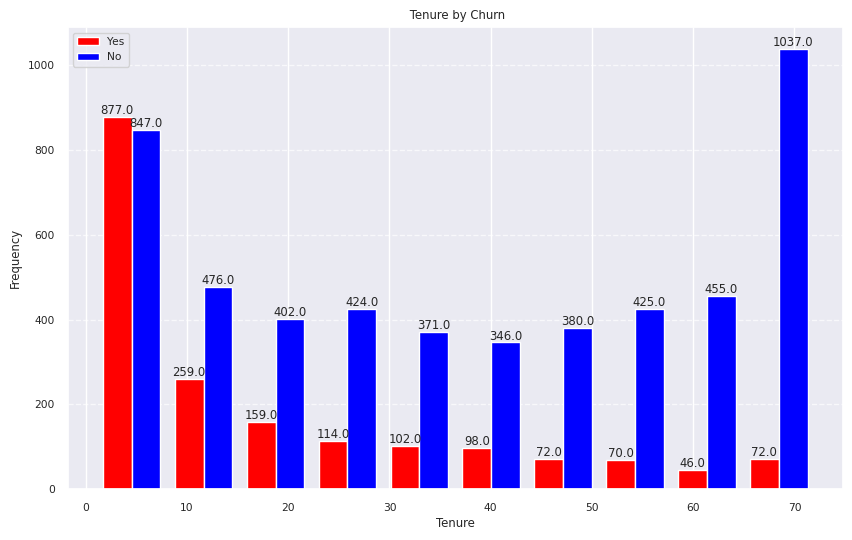

In [37]:
churned = df[df['Churn'] == 1]
not_churned = df[df['Churn'] == 0]

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['tenure'], not_churned['tenure']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title(' Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

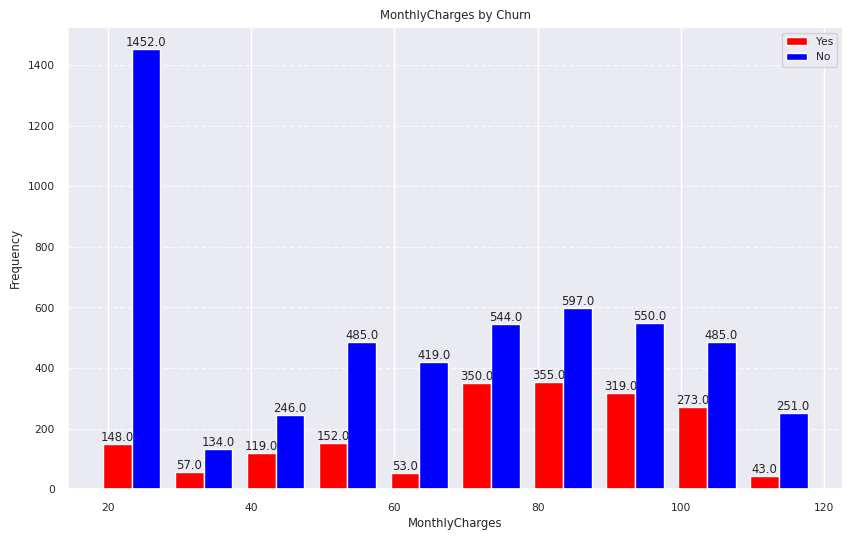

In [38]:
# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['MonthlyCharges'], not_churned['MonthlyCharges']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title('MonthlyCharges by Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

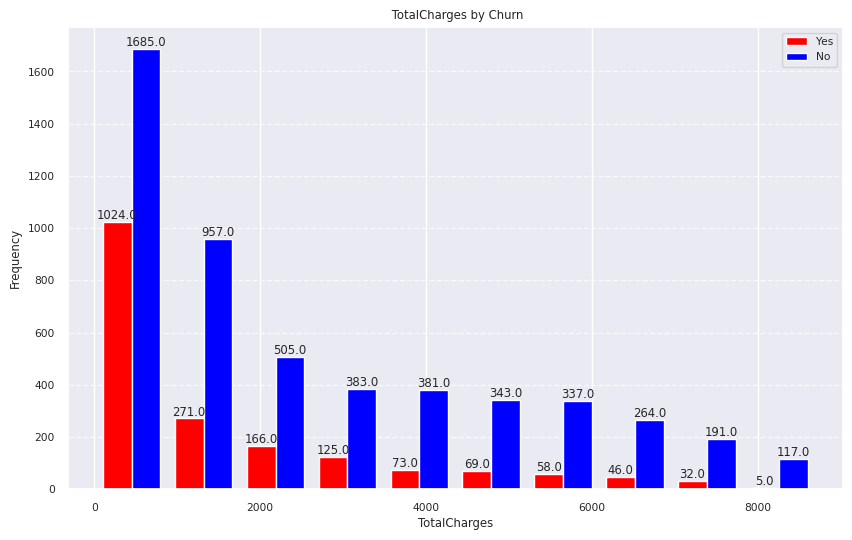

In [39]:
# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['TotalCharges'], not_churned['TotalCharges']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title(' TotalCharges by Churn')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

In [ ]:
def detect_outliers(df):
  
    for column in df.select_dtypes(include=[np.float64, np.int64]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]
    print("Outliers handled using IQR method.")
    return df

In [68]:
# We are not including tenure and Total Charges as they have continuous values
correlated = ['tenure','Contract', 'PaymentMethod','TotalCharges', 'PaperlessBilling', 'Churn']
df = df[correlated]
correlated.remove('tenure')
correlated.remove('TotalCharges')
for i in correlated:
    print(df[i].value_counts())

Contract
0    3875
2    1685
1    1472
Name: count, dtype: int64
PaymentMethod
0    2365
1    1604
2    1542
3    1521
Name: count, dtype: int64
PaperlessBilling
0    4168
1    2864
Name: count, dtype: int64
Churn
1    5163
0    1869
Name: count, dtype: int64


In [69]:
tenure_mean = df['tenure'].mean()
tenure_std = df['tenure'].std()

print(f"Mean of tenure: {tenure_mean}")
print(f"Standard Deviation of tenure: {tenure_std}")

total_charges_mean = df['TotalCharges'].mean()
total_charges_std = df['TotalCharges'].std()

print(f"Mean of TotalCharges: {total_charges_mean}")
print(f"Standard Deviation of TotalCharges: {total_charges_std}")

Mean of tenure: 32.421786120591584
Standard Deviation of tenure: 24.545259709263192
Mean of TotalCharges: 2283.300440841866
Standard Deviation of TotalCharges: 2266.7713618831453
